# **1.Defining Problem Statement and Analysing basic metrics. (10 Points)**

**Observations on shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required), statistical summary.**

# **What is Aerofit?**
 Aerofit, a dynamic player in the fitness industry, traces its origins to M/s. Sachdev Sports Co, established in 1928 by Ram Ratan Sachdev. From its modest
 beginnings in Hyderabad, India, the company evolved into a leading sports equipment supplier across Andhra Pradesh and Telangana. Recognizing the growing need for
 fitness solutions, M/s. Sachdev Overseas emerged to import quality fitness equipment under the "Aerofit" brand, ensuring affordability and post-sales excellence.
 Driven by a dedication to innovation, Nityasach Fitness Pvt Ltd was founded, spearheaded by director Nityesh Sachdev. With the brand "Aerofit" at its core, the
 company aimed to bridge the gap between international fitness technology and the Indian market. By importing advanced fitness equipment at accessible price points, Aerofit
 sought to redefine the industry landscape, prioritizing health and vitality while staying true to its legacy of passion and customer focus.
 Aerofit provides a product range including machines such as treadmills, exercise bikes, gym equipment, and fitness accessories to cater to the needs of all categories of
 people.

# **🎯Objective**
 Create comprehensive customer profiles for each AeroFit treadmill product through descriptive analytics. Develop two-way contingency tables and analyze conditional and
 marginal probabilities to discern customer characteristics, facilitating improved product recommendations and informed business decisions.

 # **📚 About Data**
 The company collected the data on individuals who

purchased a treadmill from the AeroFit stores during three months.The data is available in a single csv file
Product Portfolio.
* The KP281 is an entry-level treadmill that sells for USD 1,500.
* The KP481 is for mid-level runners that sell for USD 1,750.
* The KP781 treadmill is having advanced features that sell for USD 2,500.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import copy

In [5]:
df = pd.read_csv('aerofit_treadmill.csv')

In [6]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [7]:
df.tail()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120
179,KP781,48,Male,18,Partnered,4,5,95508,180


In [8]:
df.shape

(180, 9)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


# **2.Non-Graphical Analysis: Value counts and unique attributes. ​​(10 Points)**

# **Categorical Variables**

# **Product**

**Unique Values:** 3 (KP281, KP481, KP781)

**Value Counts:**

KP281: 80 customers (44.4%)

KP481: 60 customers (33.3%)

KP781: 40 customers (22.2%)


# **Gender**

**Unique Values:** 2 (Male, Female)

**Value Counts:**

Male: 104 customers (57.8%)

Female: 76 customers (42.2%)

# **Marital Status**

**Unique Values:** 2 (Single, Partnered)

**Value Counts:**

Partnered: 107 customers (59.4%)

Single: 73 customers (40.6%)

# **Numerical Variables**

# **Age**

**Unique Values:** 33

Range: 18–50 years

Mean: 28.8

Median: 26


# **Education**

**Unique Values:** 8

Range: 12–21 years

Mean: 15.6


# **Usage**

**Unique Values:** 6

Range: 2–7 times/week

Mean: 3.5


# **Fitness**


**Unique Values:** 5

Range: 1–5 (Self-rated)

Mean: 3.3


# **Income**

**Unique Values:** 180 (All values are unique)

Range: $29,562–$104,581

Mean: $53,720


# **Miles**


**Unique Values:** 83

Range: 21–360 miles/week

Mean: 103.2


In [13]:
# Non-graphical analysis: Value counts for categorical variables
categorical_columns = ['Product', 'Gender', 'MaritalStatus']

print("### Categorical Variables: Value Counts and Unique Attributes ###\n")
for col in categorical_columns:
    print(f"Column: {col}")
    print(f"Unique Values: {df[col].nunique()}")
    print("Value Counts:")
    print(df[col].value_counts(), "\n")

### Categorical Variables: Value Counts and Unique Attributes ###

Column: Product
Unique Values: 3
Value Counts:
Product
KP281    80
KP481    60
KP781    40
Name: count, dtype: int64 

Column: Gender
Unique Values: 2
Value Counts:
Gender
Male      104
Female     76
Name: count, dtype: int64 

Column: MaritalStatus
Unique Values: 2
Value Counts:
MaritalStatus
Partnered    107
Single        73
Name: count, dtype: int64 



In [17]:
# Unique values and summary for numerical columns
numerical_columns = ['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']

print("### Numerical Variables: Unique Attributes and Summary Statistics ###\n")
for col in numerical_columns:
    print(f"Column: {col}")
    print(f"Unique Values: {df[col].nunique()}")
    print(f"Summary Statistics:\n{df[col].describe()}\n")

### Numerical Variables: Unique Attributes and Summary Statistics ###

Column: Age
Unique Values: 32
Summary Statistics:
count    180.000000
mean      28.788889
std        6.943498
min       18.000000
25%       24.000000
50%       26.000000
75%       33.000000
max       50.000000
Name: Age, dtype: float64

Column: Education
Unique Values: 8
Summary Statistics:
count    180.000000
mean      15.572222
std        1.617055
min       12.000000
25%       14.000000
50%       16.000000
75%       16.000000
max       21.000000
Name: Education, dtype: float64

Column: Usage
Unique Values: 6
Summary Statistics:
count    180.000000
mean       3.455556
std        1.084797
min        2.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        7.000000
Name: Usage, dtype: float64

Column: Fitness
Unique Values: 5
Summary Statistics:
count    180.000000
mean       3.311111
std        0.958869
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        

# **3.Visual Analysis - Univariate & Bivariate. (30 Points)**

* For continuous variable(s): Distplot, countplot,histogram for univariate analysis (10 Points)

* For categorical variable(s): Boxplot (10 Points)

* For correlation: Heatmaps, Pairplots(10 Points)


# **Univariate Analysis**

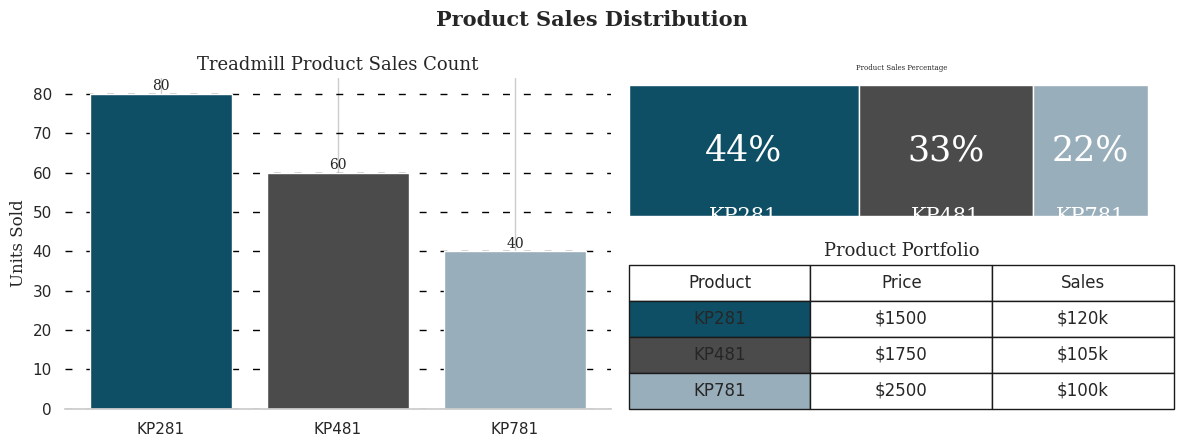

In [45]:
# Import libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the plot style
fig = plt.figure(figsize=(12, 5))
gs = fig.add_gridspec(2, 2)

# ----------------------- Plot 1: Product Sales Count ----------------------- #
ax0 = fig.add_subplot(gs[:, 0])

# Counting product occurrences
product_count = df['Product'].value_counts()
color_map = ["#0e4f66", "#4b4b4c", '#99AEBB']

# Creating the bar plot
ax0.bar(product_count.index, product_count.values, color=color_map, zorder=2)

# Adding value counts to the bars
for i in range(len(product_count)):
    ax0.text(i, product_count.values[i] + 2, f"{product_count.values[i]}",
             {'font': 'serif', 'size': 10}, ha='center', va='center')

# Adding grid lines
ax0.grid(color='black', linestyle='--', axis='y', zorder=0, dashes=(5, 10))

# Removing axis lines (cleaner visualization)
for s in ['top', 'left', 'right']:
    ax0.spines[s].set_visible(False)

# Adding labels
ax0.set_ylabel('Units Sold', fontfamily='serif', fontsize=12)
ax0.set_title('Treadmill Product Sales Count', fontfamily='serif', fontsize=13)

# ----------------------- Plot 2: Product Sales % ----------------------- #
ax1 = fig.add_subplot(gs[0, 1])

# Calculating product sales percentages
product_count_percent = (product_count / df.shape[0] * 100).round(0)

# Plotting a horizontal stacked bar
ax1.barh(0, product_count_percent[0], color="#0e4f66")
ax1.barh(0, product_count_percent[1], left=product_count_percent[0], color="#4b4b4c")
ax1.barh(0, product_count_percent[2], left=product_count_percent[0] + product_count_percent[1], color="#99AEBB")

# Adding percentage text to each bar
info_percent = [
    product_count_percent[0] / 2,
    product_count_percent[0] + product_count_percent[1] / 2,
    product_count_percent[0] + product_count_percent[1] + product_count_percent[2] / 2
]

for i in range(3):
    ax1.text(info_percent[i], 0, f"{product_count_percent[i]:.0f}%", va='center', ha='center',
             fontsize=25, fontweight='light', fontfamily='serif', color='white')
    ax1.text(info_percent[i], -0.4, product_count.index[i], va='center', ha='center',
             fontsize=15, fontweight='light', fontfamily='serif', color='white')

# Removing axes
ax1.axis('off')
ax1.set_title('Product Sales Percentage', fontfamily='serif', fontsize=5)

# ----------------------- Plot 3: Product Portfolio Table ----------------------- #
ax2 = fig.add_subplot(gs[1, 1])

# Creating table data
product_portfolio = [['KP281', '$1500', '$120k'], ['KP481', '$1750', '$105k'], ['KP781', '$2500', '$100k']]
color_2d = [['#0e4f66', '#FFFFFF', '#FFFFFF'], ['#4b4b4c', '#FFFFFF', '#FFFFFF'], ['#99AEBB', '#FFFFFF', '#FFFFFF']]

# Creating the table
table = ax2.table(cellText=product_portfolio, cellColours=color_2d, cellLoc='center',
                  colLabels=['Product', 'Price', 'Sales'], colLoc='center', bbox=[0, 0, 1, 1])
table.auto_set_font_size(False)
table.set_fontsize(12)

# Removing axis lines
ax2.axis('off')
ax2.set_title('Product Portfolio', fontfamily='serif', fontsize=13)

# ----------------------- Final Layout & Title ----------------------- #
fig.suptitle('Product Sales Distribution', fontproperties={'family': 'serif', 'size': 15, 'weight': 'bold'})
plt.tight_layout(rect=[0, 0.09, 1, 1])
plt.show()


# **Gender and Marital Status Disribution**

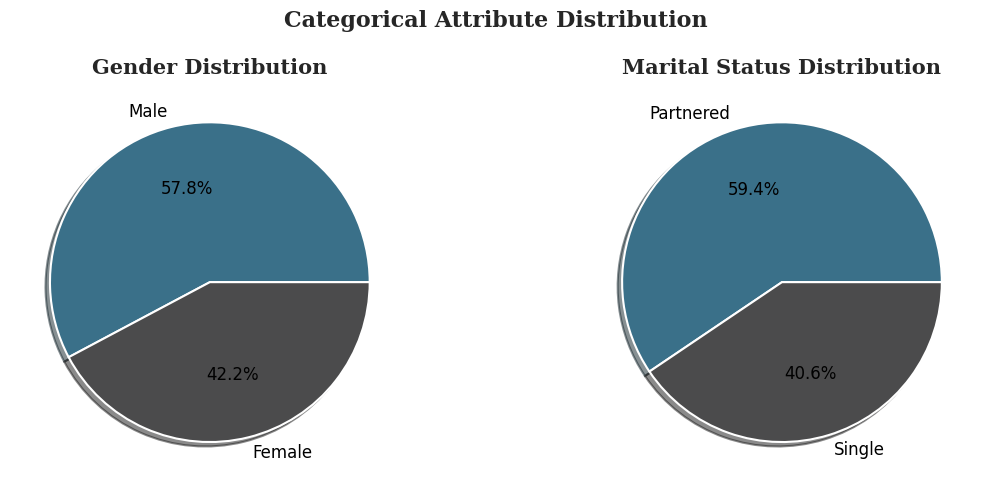

In [46]:
# Import required libraries
import matplotlib.pyplot as plt

# Setting the plot style
fig = plt.figure(figsize=(12, 5))
gs = fig.add_gridspec(1, 2)

# -------------------- Gender Distribution Pie Chart -------------------- #
ax0 = fig.add_subplot(gs[0, 0])
color_map_gender = ["#3A7089", "#4b4b4c"]  # Color palette

# Pie chart for Gender
ax0.pie(df['Gender'].value_counts().values,
        labels=df['Gender'].value_counts().index,
        autopct='%.1f%%',
        shadow=True,
        colors=color_map_gender,
        wedgeprops={'linewidth': 1.5, 'edgecolor': 'white'},
        textprops={'fontsize': 12, 'color': 'black'})

# Title for Gender Distribution
ax0.set_title('Gender Distribution', fontdict={'family': 'serif', 'size': 15, 'weight': 'bold'})

# -------------------- Marital Status Pie Chart -------------------- #
ax1 = fig.add_subplot(gs[0, 1])
color_map_marital = ["#3A7089", "#4b4b4c"]  # Reusing the color palette for consistency

# Pie chart for Marital Status
ax1.pie(df['MaritalStatus'].value_counts().values,
        labels=df['MaritalStatus'].value_counts().index,
        autopct='%.1f%%',
        shadow=True,
        colors=color_map_marital,
        wedgeprops={'linewidth': 1.5, 'edgecolor': 'white'},
        textprops={'fontsize': 12, 'color': 'black'})

# Title for Marital Status Distribution
ax1.set_title('Marital Status Distribution', fontdict={'family': 'serif', 'size': 15, 'weight': 'bold'})

# -------------------- Final Adjustments -------------------- #
fig.suptitle('Categorical Attribute Distribution', fontfamily='serif', fontsize=16, weight='bold')
plt.tight_layout()
plt.show()


# **Buyer Fitness and Treadmill Usage**

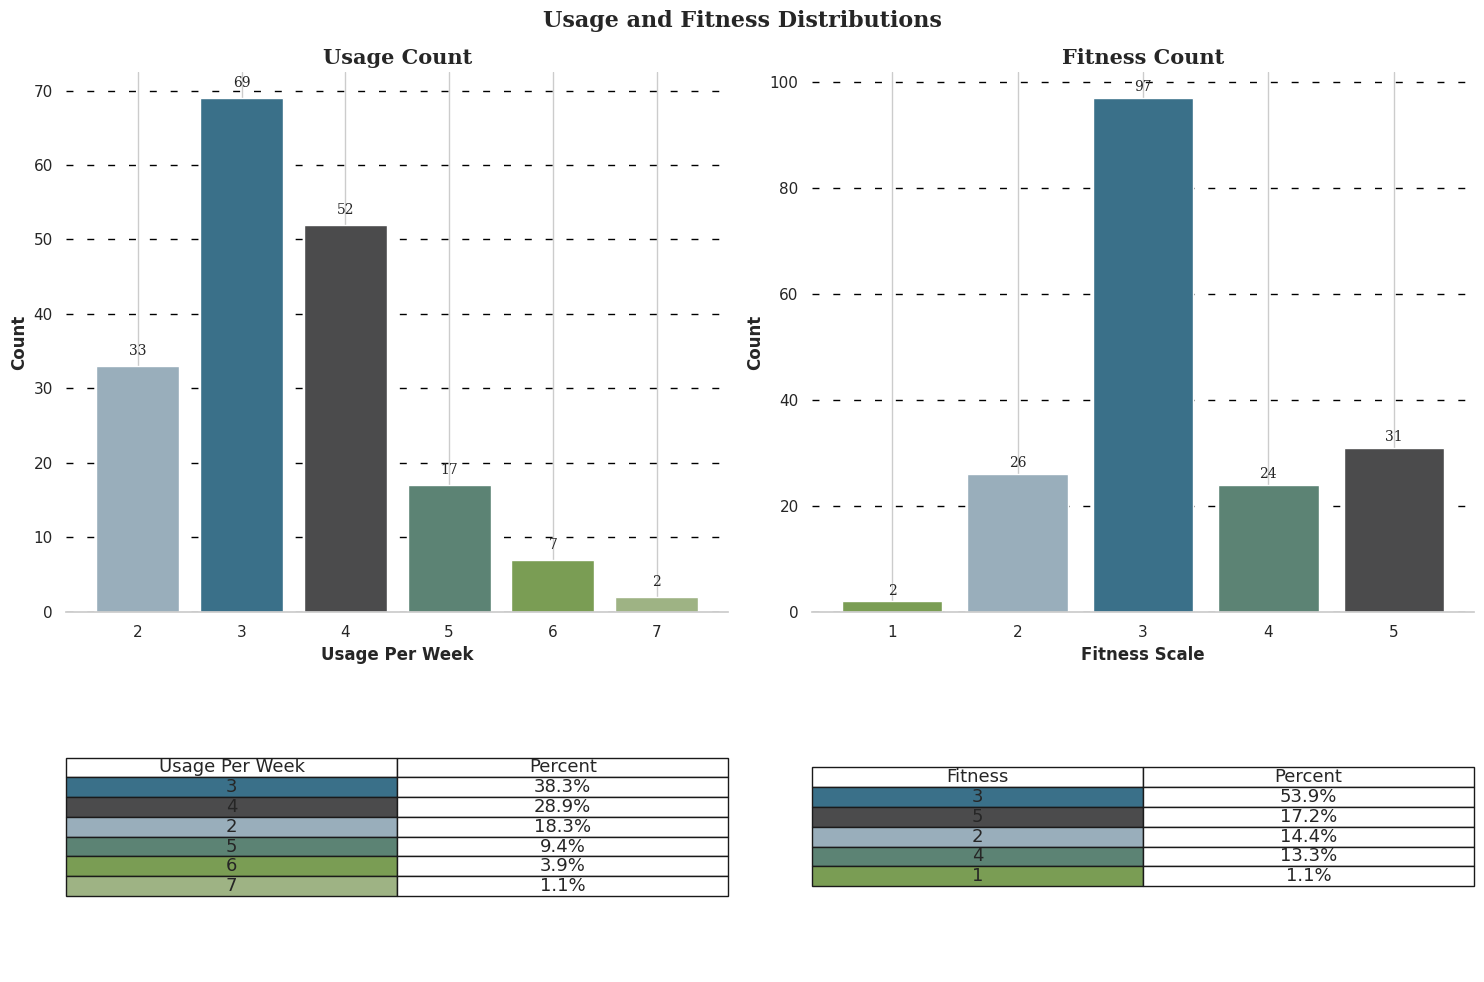

In [49]:
# Importing libraries
import matplotlib.pyplot as plt

# Setting the plot style
fig = plt.figure(figsize=(15, 10))
gs = fig.add_gridspec(2, 2, height_ratios=[0.65, 0.35])

# -------------------- Usage Distribution -------------------- #
ax0 = fig.add_subplot(gs[0, 0])

# Compute counts and percentages
usage_counts = df['Usage'].value_counts()
usage_percent = (usage_counts / len(df) * 100).round(1)
color_map = ["#3A7089", "#4b4b4c", '#99AEBB', '#5C8374', '#7A9D54', '#9EB384']

# Bar plot
ax0.bar(x=usage_counts.index, height=usage_counts.values, color=color_map, zorder=2)
for i in usage_counts.index:
    ax0.text(i, usage_counts[i] + 2, usage_counts[i], ha='center', va='center', fontsize=10, fontfamily='serif')

# Grid and style
ax0.grid(color='black', linestyle='--', axis='y', zorder=0, dashes=(5, 10))
for s in ['top', 'left', 'right']:
    ax0.spines[s].set_visible(False)

ax0.set_title('Usage Count', fontdict={'family': 'serif', 'size': 15, 'weight': 'bold'})
ax0.set_ylabel('Count', fontweight='bold', fontsize=12)
ax0.set_xlabel('Usage Per Week', fontweight='bold', fontsize=12)

# Table for Usage Info
ax1 = fig.add_subplot(gs[1, 0])
usage_table_data = list(zip(usage_counts.index, usage_percent.astype(str) + '%'))
table = ax1.table(cellText=usage_table_data, colLabels=['Usage Per Week', 'Percent'], loc='center', cellLoc='center',
                  cellColours=[[color_map[i], '#FFFFFF'] for i in range(len(usage_counts))])
table.auto_set_font_size(False)
table.set_fontsize(13)
ax1.axis('off')

# -------------------- Fitness Distribution -------------------- #
ax2 = fig.add_subplot(gs[0, 1])

# Compute counts and percentages
fitness_counts = df['Fitness'].value_counts()
fitness_percent = (fitness_counts / len(df) * 100).round(1)

# Bar plot
ax2.bar(x=fitness_counts.index, height=fitness_counts.values, color=color_map, zorder=2)
for i in fitness_counts.index:
    ax2.text(i, fitness_counts[i] + 2, fitness_counts[i], ha='center', va='center', fontsize=10, fontfamily='serif')

# Grid and style
ax2.grid(color='black', linestyle='--', axis='y', zorder=0, dashes=(5, 10))
for s in ['top', 'left', 'right']:
    ax2.spines[s].set_visible(False)

ax2.set_title('Fitness Count', fontdict={'family': 'serif', 'size': 15, 'weight': 'bold'})
ax2.set_ylabel('Count', fontweight='bold', fontsize=12)
ax2.set_xlabel('Fitness Scale', fontweight='bold', fontsize=12)

# Table for Fitness Info
ax3 = fig.add_subplot(gs[1, 1])
fitness_table_data = list(zip(fitness_counts.index, fitness_percent.astype(str) + '%'))
table = ax3.table(cellText=fitness_table_data, colLabels=['Fitness', 'Percent'], loc='center', cellLoc='center',
                  cellColours=[[color_map[i], '#FFFFFF'] for i in range(len(fitness_counts))])
table.auto_set_font_size(False)
table.set_fontsize(13)
ax3.axis('off')

# -------------------- Final Adjustments -------------------- #
fig.suptitle('Usage and Fitness Distributions', fontfamily='serif', fontsize=16, weight='bold')
plt.tight_layout()
plt.show()


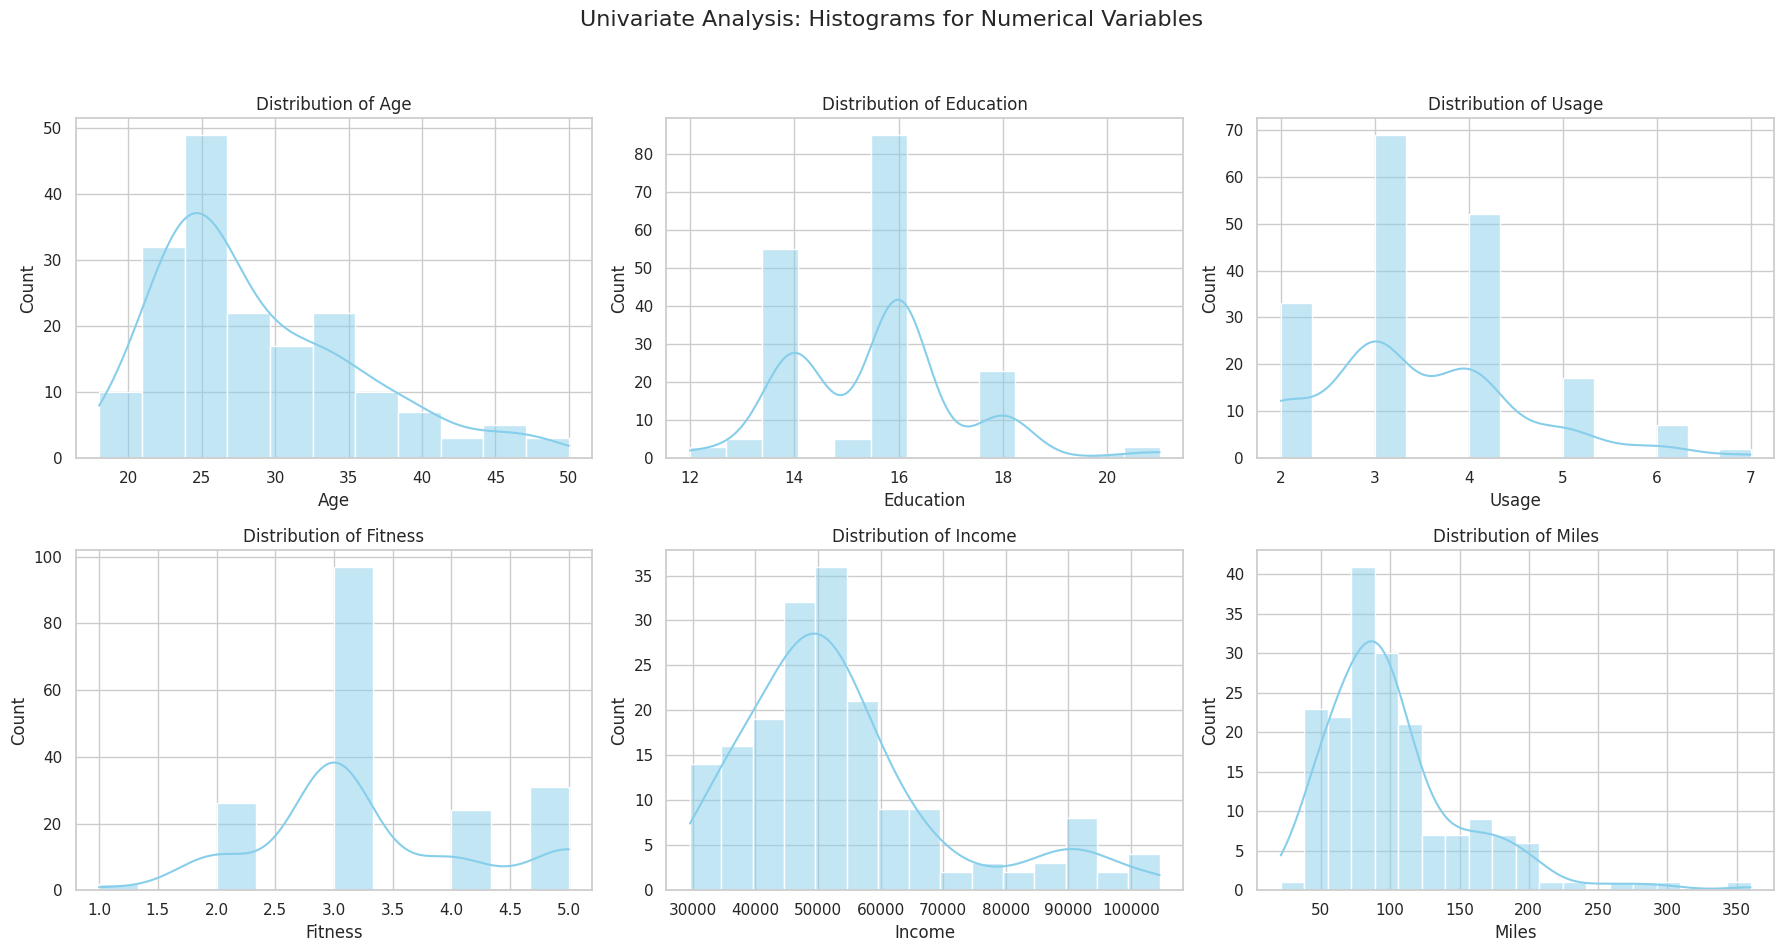

In [27]:
# ----- 1. Univariate Analysis -----
# Histograms for numerical columns
numerical_columns = ['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle("Univariate Analysis: Histograms for Numerical Variables", fontsize=16)

for i, col in enumerate(numerical_columns):
    sns.histplot(df[col], kde=True, ax=axes[i//3, i%3], color="skyblue")
    axes[i//3, i%3].set_title(f"Distribution of {col}")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

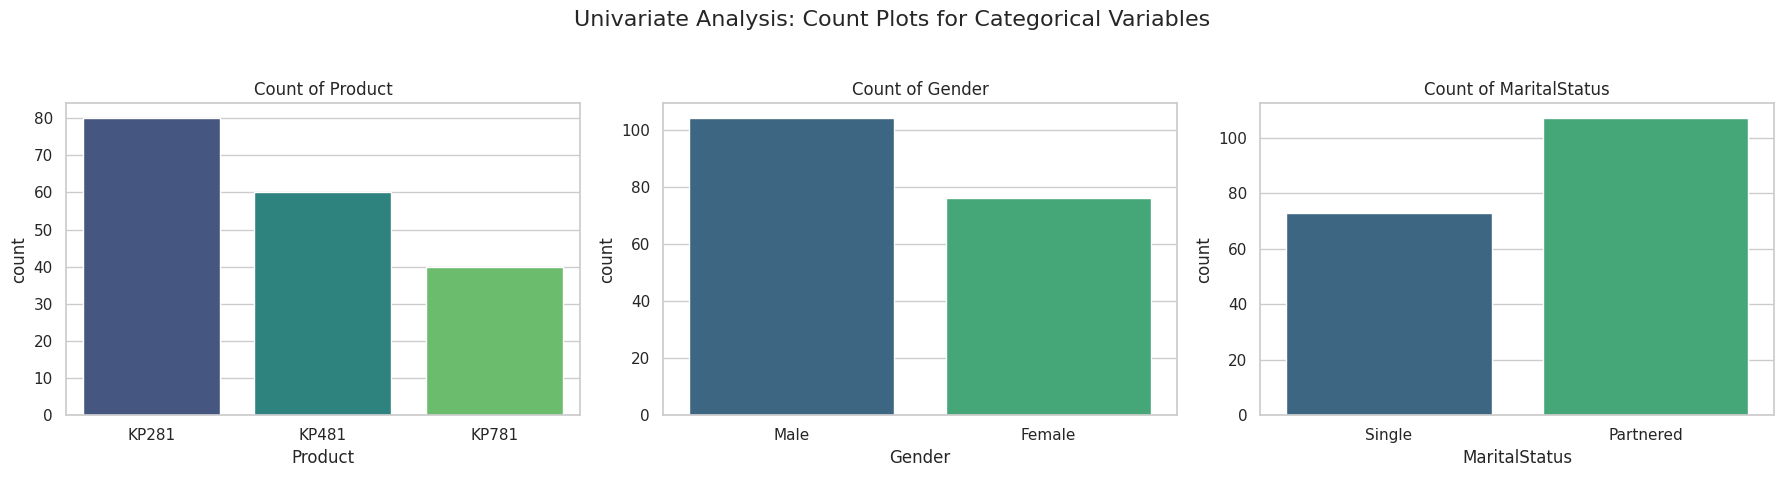

In [26]:
# Countplot for categorical variables
categorical_columns = ['Product', 'Gender', 'MaritalStatus']
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle("Univariate Analysis: Count Plots for Categorical Variables", fontsize=16)

for i, col in enumerate(categorical_columns):
    sns.countplot(data=df, x=col, ax=axes[i], palette="viridis")
    axes[i].set_title(f"Count of {col}")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# **Bivariate Analysis**

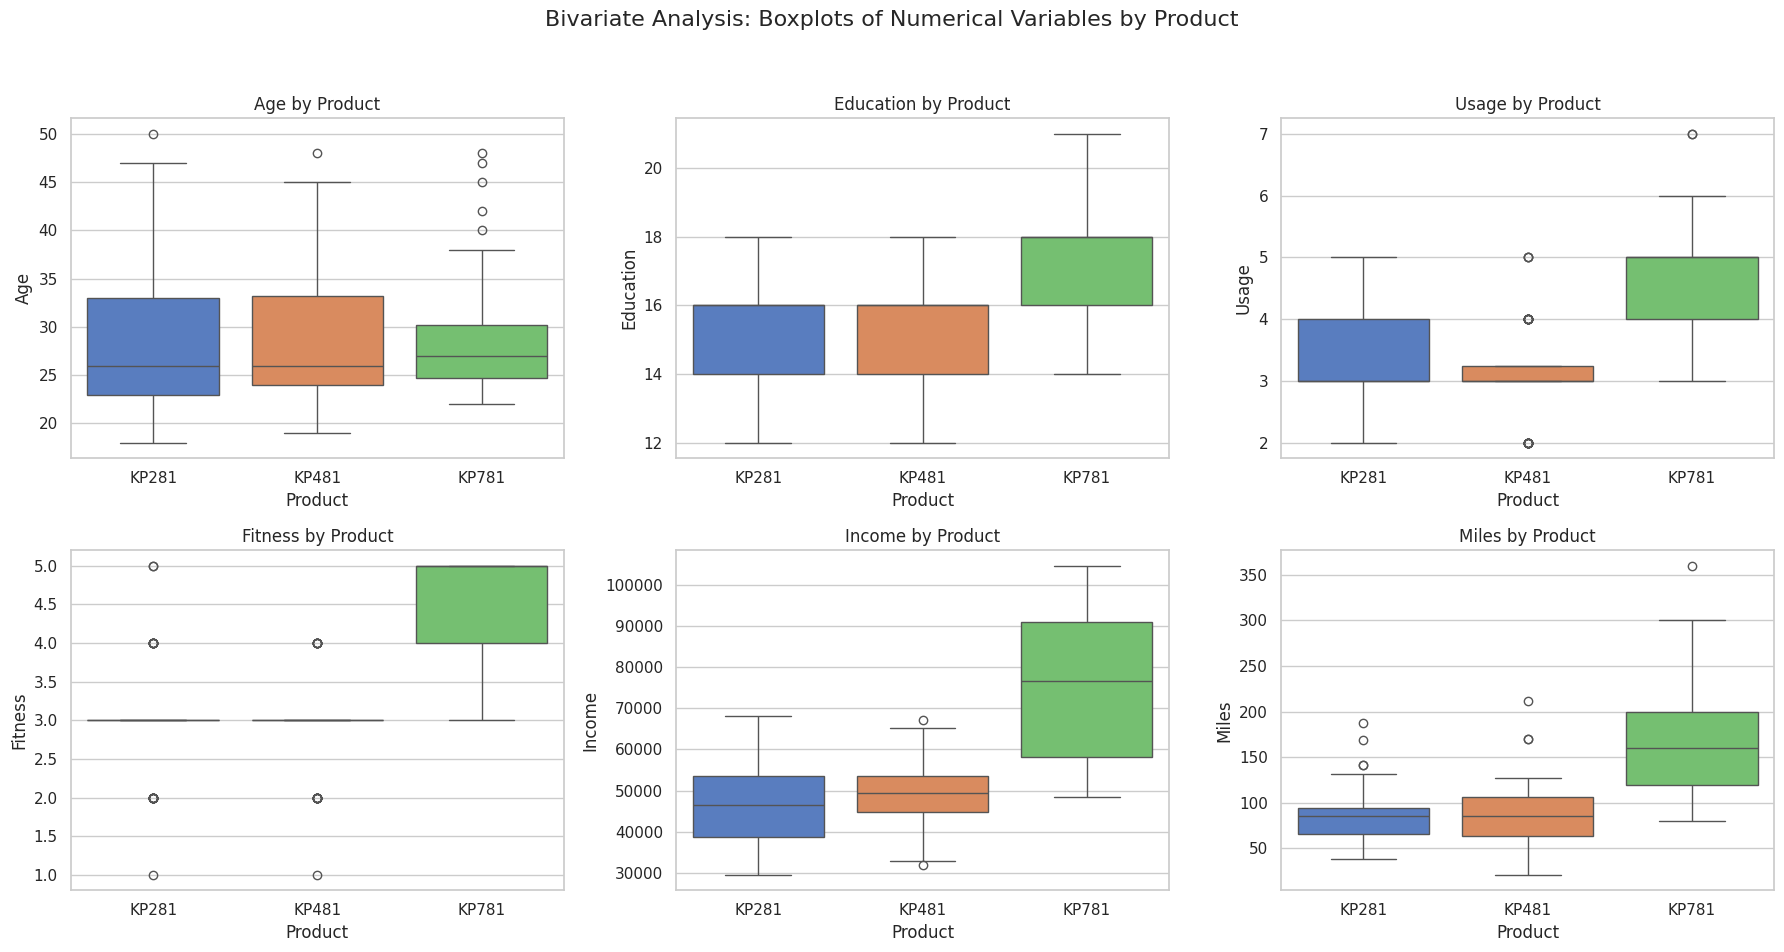

In [28]:
# ----- 2. Bivariate Analysis -----
# Boxplots for numerical variables grouped by 'Product'
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle("Bivariate Analysis: Boxplots of Numerical Variables by Product", fontsize=16)

for i, col in enumerate(numerical_columns):
    sns.boxplot(x="Product", y=col, data=df, ax=axes[i//3, i%3], palette="muted")
    axes[i//3, i%3].set_title(f"{col} by Product")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

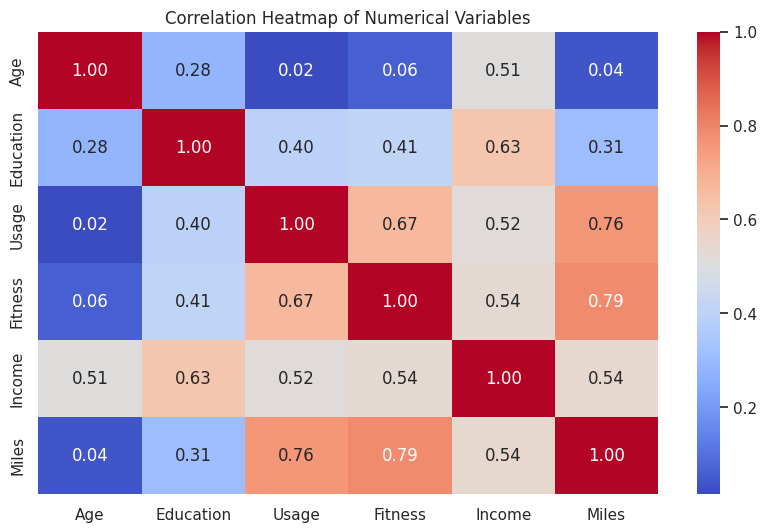

In [30]:
# ----- 3. Correlation Analysis -----
# Heatmap to visualize correlations between numerical variables
plt.figure(figsize=(10, 6))
correlation = df[numerical_columns].corr()
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numerical Variables")
plt.show()

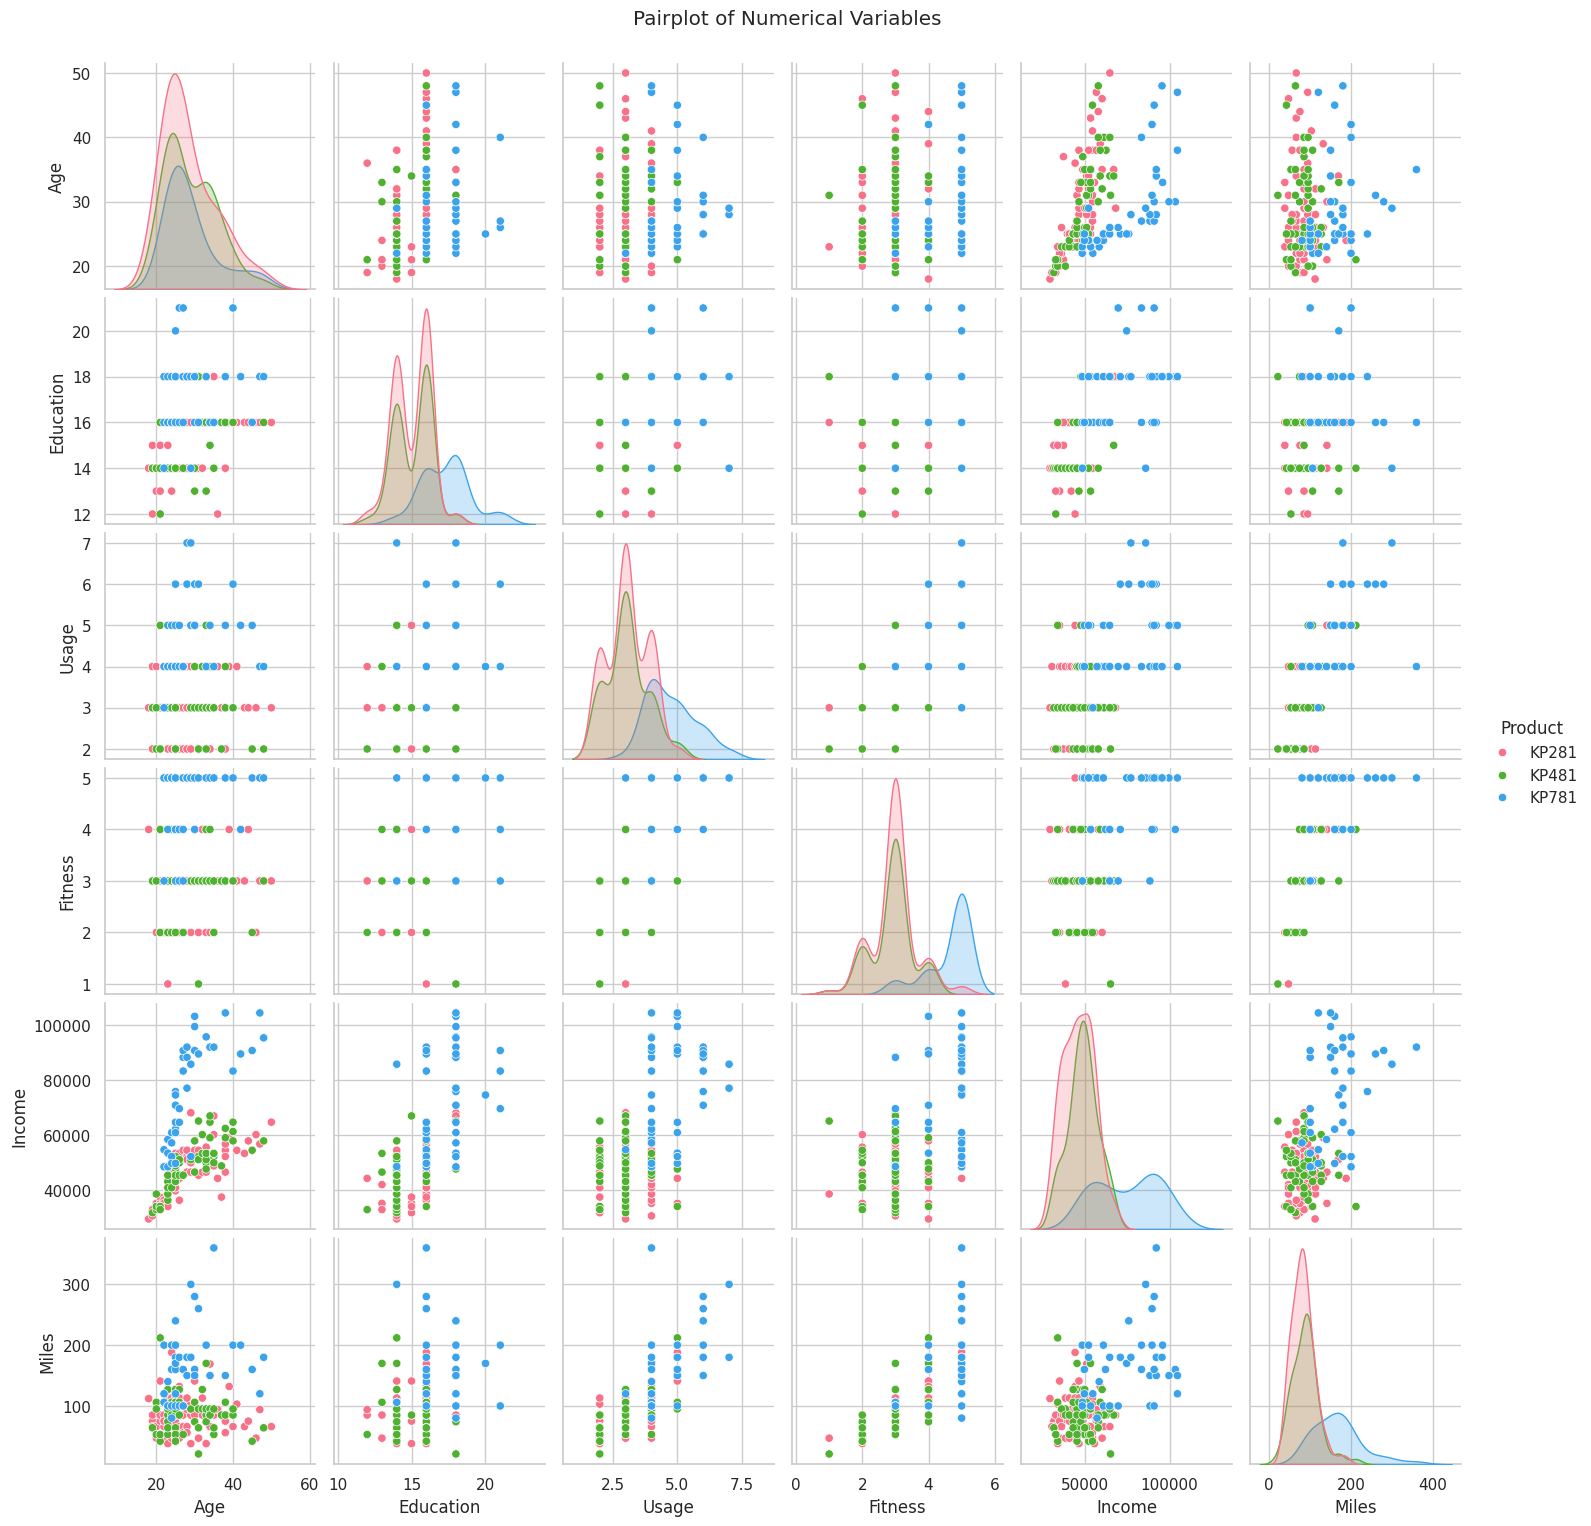

In [31]:
# Pairplot to see pairwise relationships
sns.pairplot(data=df, hue="Product", palette="husl", diag_kind="kde")
plt.suptitle("Pairplot of Numerical Variables", y=1.02)
plt.show()

# **4.Missing Value & Outlier Detection. (10 Points)**

In [33]:
# ----- 1. Check for Missing Values -----
print("Missing Values in Each Column:")
print(df.isnull().sum())

Missing Values in Each Column:
Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64


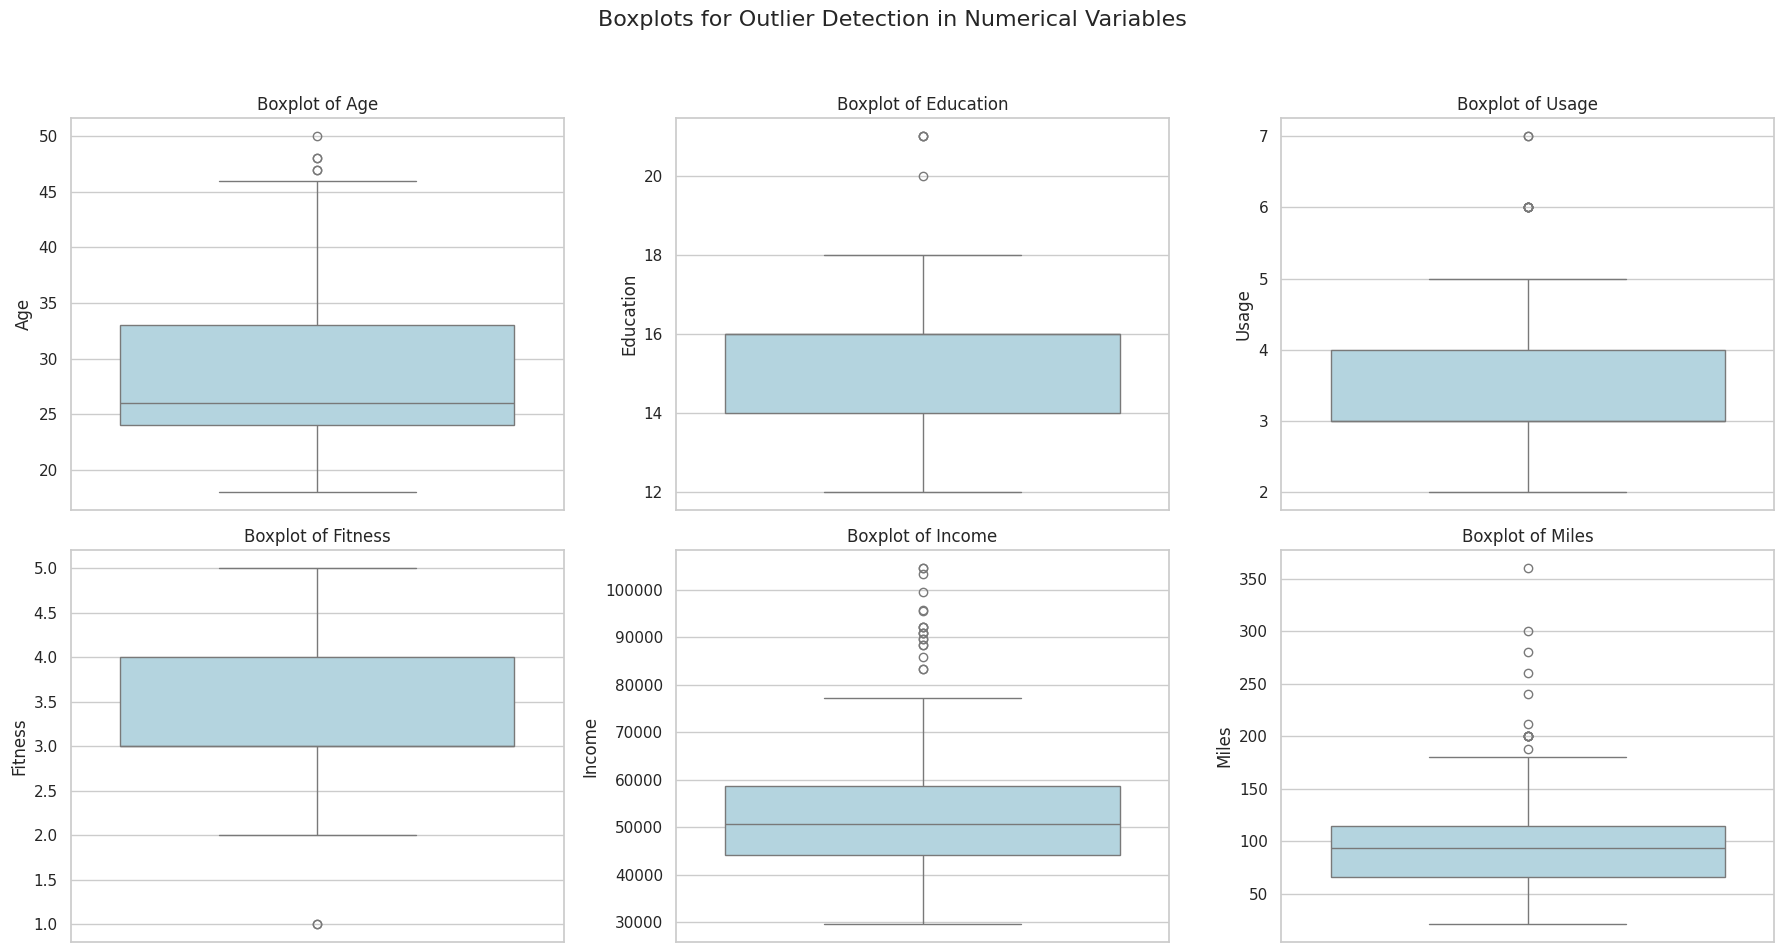

In [34]:
# ----- 2. Detecting Outliers -----
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize outliers using boxplots for numerical variables
numerical_columns = ['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle("Boxplots for Outlier Detection in Numerical Variables", fontsize=16)

for i, col in enumerate(numerical_columns):
    sns.boxplot(y=df[col], ax=axes[i//3, i%3], color="lightblue")
    axes[i//3, i%3].set_title(f"Boxplot of {col}")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [35]:
# ----- 3. Statistical Summary for Outlier Analysis -----
print("Statistical Summary for Numerical Columns:")
print(df.describe())

Statistical Summary for Numerical Columns:
              Age   Education       Usage     Fitness         Income  \
count  180.000000  180.000000  180.000000  180.000000     180.000000   
mean    28.788889   15.572222    3.455556    3.311111   53719.577778   
std      6.943498    1.617055    1.084797    0.958869   16506.684226   
min     18.000000   12.000000    2.000000    1.000000   29562.000000   
25%     24.000000   14.000000    3.000000    3.000000   44058.750000   
50%     26.000000   16.000000    3.000000    3.000000   50596.500000   
75%     33.000000   16.000000    4.000000    4.000000   58668.000000   
max     50.000000   21.000000    7.000000    5.000000  104581.000000   

            Miles  
count  180.000000  
mean   103.194444  
std     51.863605  
min     21.000000  
25%     66.000000  
50%     94.000000  
75%    114.750000  
max    360.000000  


In [36]:
# ----- 4. Identify Outliers Using IQR -----
def detect_outliers(col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    return outliers

# Check for outliers in all numerical columns
for col in numerical_columns:
    outliers = detect_outliers(col)
    print(f"\nNumber of outliers in {col}: {len(outliers)}")


Number of outliers in Age: 5

Number of outliers in Education: 4

Number of outliers in Usage: 9

Number of outliers in Fitness: 2

Number of outliers in Income: 19

Number of outliers in Miles: 13


# **5.Business Insights based on Non-Graphical and Visual Analysis. (10 Points)**

* Comments on the range of attributes.
* Comments on the distribution of the variables and relationship between them.
* Comments for each univariate and bivariate plot.

# **Range of Attributes:**

**Age:**

* Range: 18 to 50 years.

* Most customers are in their mid-20s to mid-30s, indicating that younger individuals are more likely to purchase treadmills.

**Education:**

* Range: 12 to 21 years of education.

* Customers generally have higher educational levels, averaging around 16 years (indicative of college graduates).

**Usage:**

* Range: 2 to 7 times per week.

* Most customers plan to use the treadmill 3–4 times per week, showing moderate usage intentions.

**Fitness:**

* Range: 1 to 5 (self-rated).

* The average fitness score is 3.3, indicating most customers perceive themselves as moderately fit.

**Income:**

* Range: $29,562  to $104,581.

* Customers represent a wide income range, with the majority earning around $50,000–$60,000 annually.

**Miles:**

* Range: 21 to 360 miles per week.

* Most customers aim to run/walk around 90–110 miles per week, showing a balance between casual and serious fitness enthusiasts.


# **Comments on the Distribution of Variables:**
# **1.Univariate Analysis:**

**Product:**

* KP281 (Entry-level) is the most popular treadmill (44.4%), followed by KP481 (33.3%), and KP781 (Advanced, 22.2%).

* This suggests price sensitivity, with customers preferring entry-level and mid-tier options.

**Gender:**

* Males (57.8%) dominate treadmill purchases compared to females (42.2%).

**Marital Status:**

* Partnered customers (59.4%) outnumber single customers (40.6%).

**Age, Education, Income, Miles:**

* Most numerical variables show right-skewed distributions (e.g., Income, Miles), indicating a small segment of outliers with very high values.

# **2.Bivariate Analysis:**

**Income vs Product:**

* Customers purchasing KP781 (advanced treadmill) have higher incomes compared to those buying KP281 or KP481.
* Actionable Insight: KP781 can be marketed to high-income individuals.

**Age vs Product:**

* KP281 buyers tend to be younger, while KP481 and KP781 buyers are slightly older.
* Young customers prioritize affordability, while older customers look for features.

**Fitness vs Product:**

* Customers with higher fitness scores are more likely to purchase KP481 or KP781, indicating that mid-level and advanced treadmills attract fitness-conscious individuals.

**Miles vs Product:**

* KP781 buyers expect to run more miles per week (higher commitment), while KP281 buyers plan for moderate usage.

**Gender vs Product:**

* Males are more likely to purchase KP781, while females show a preference for KP281.
Marketing KP781 to male fitness enthusiasts may be effective.

# **3.Correlation:**

* Strong positive correlation observed between Income and Miles (customers with higher incomes tend to aim for longer weekly distances).
Moderate correlation between Fitness and Miles, reinforcing that fitness-conscious customers aim to use treadmills for higher mileage.


# **Comments for Plots:**
**1.Univariate Plots:**

Histograms for Age, Income, and Miles show skewed distributions, with a concentration of values toward the lower end.
Countplots for Product, Gender, and Marital Status reveal customer preferences, with KP281 being the most purchased.

**2.Bivariate Plots:**

Boxplots clearly highlight differences in Income, Age, and Fitness across the treadmill types.
KP781 buyers have higher incomes and fitness levels, while KP281 appeals to younger, budget-conscious customers.

**3.Heatmap and Pairplot:**

Heatmap identifies correlations like Income ↔ Miles and Fitness ↔ Usage.
Pairplots visualize relationships, showing clustering patterns for different treadmill products.

# **6.Recommendations (10 Points)** - Actionable items for business. No technical jargon. No complications. Simple action items that everyone can understand.

# **1. Segment Target Audience by Product.**


* KP281 (Entry-Level Treadmill, $1,500):

Target younger customers (18–30 years old) and those with lower to mid-range incomes.
Highlight affordability and ease of use in advertisements.
Focus marketing on female customers who showed greater interest in this product.

* KP481 (Mid-Level Treadmill, $1,750):

Promote to moderately fit individuals aged 25–40 years with mid-level incomes.
Position KP481 as the “best value” treadmill—offering quality features without a premium price.
Appeal to both partnered and single customers equally.

* KP781 (Advanced Treadmill, $2,500):

Target high-income individuals and fitness enthusiasts who are committed to running longer distances.
Focus marketing on males aged 30–50 years.
Highlight advanced features like durability, tech integrations, and performance metrics.

# **2.Develop Targeted Marketing Campaigns:**
**Create age-based and income-based campaigns for each treadmill:**
Use social media platforms (e.g., Instagram, Facebook) to target younger customers for KP281.
Use fitness-focused platforms (e.g., fitness blogs, YouTube ads) to market KP481 and KP781.
Use personalized recommendations to customers based on their fitness level and weekly usage goals.

# **3.Introduce Bundle Offers:**
Offer fitness accessories (e.g., yoga mats, water bottles) as a bundle with KP281 to attract budget-conscious buyers.
Provide extended warranties or maintenance plans with KP781 to appeal to premium buyers.

# **4.Improve In-Store and Online Shopping Experience:**
**Train sales teams to recommend treadmills based on:**
Fitness goals (Usage, Miles).
Income levels.
Develop a simple quiz or recommendation tool on the website to suggest the best treadmill model based on customer preferences (e.g., fitness level, budget, weekly usage).
# **5.Focus on Fitness Influencers and Testimonials:**
**Partner with fitness influencers to showcase the features and benefits of each treadmill:**

Use advanced features of KP781 to attract serious runners.
Highlight the affordability of KP281 for beginners.
Share testimonials from customers based on their age, fitness levels, and goals to build trust.

# **6.Loyalty and Referral Programs:**
Implement loyalty programs to encourage repeat purchases of fitness accessories.
Offer referral discounts to customers who bring in friends or family to purchase treadmills.
# **7.Promotions During Key Seasons:**
Run targeted promotions during New Year (fitness resolutions) and summer (fitness preparation).
Offer discounts or financing options for KP281 and KP481 during these periods.


# **Summary of Actionable Items:**
* Segment marketing strategies based on age, income, and fitness levels.
* Develop targeted advertising campaigns for each treadmill type.
* Bundle fitness accessories or warranties to enhance value.
* Improve recommendations through tools and trained sales staff.
* Collaborate with fitness influencers and leverage customer testimonials.
* Introduce loyalty and referral programs.
* Run seasonal promotions to boost sales.